In [71]:
import pandas as pd;
import numpy as np;

covid = pd.read_csv('./models/google_new.csv');
covid.head()

,iso,country,date,grocery_pharmacy,parks,residential,retail_recreation,transit_stations,workplaces,total_cases,fatalities
0,AR,Argentina,2020-02-23,8.185,17.563,0.437,13.644,5.334,-2.486,0,0
1,AR,Argentina,2020-02-24,-15.875,25.605,6.321,-9.973,-26.785,-53.687,0,0
2,AR,Argentina,2020-02-25,-17.135,1.325,6.895,-19.717,-28.485,-50.053,0,0
3,AR,Argentina,2020-02-26,2.304,5.399,-2.273,0.845,9.461,12.584,0,0
4,AR,Argentina,2020-02-27,-0.404,-5.267,-0.493,-0.584,7.983,12.407,0,0


In [97]:
usa = covid.loc[covid['country'] == 'US']
usa= usa.drop(columns=['iso', 'country', 'date', 'fatalities'])
usa.reset_index(drop=True, inplace=True)
usa

,grocery_pharmacy,parks,residential,retail_recreation,transit_stations,workplaces,total_cases
0,3.124,22.982,-0.823,6.813,4.992,2.238,0
1,0.717,9.233,0.040,1.709,1.285,2.776,0
2,1.222,9.106,-0.138,4.031,2.155,1.899,0
3,2.464,5.209,-0.630,7.340,3.498,2.198,0
4,3.429,12.251,-0.459,7.503,4.013,1.834,0
5,3.392,9.685,-1.284,7.996,5.340,2.428,0
6,7.349,20.717,-1.858,11.518,7.367,4.403,0
7,8.816,17.755,-1.490,12.864,6.691,2.954,0
8,6.123,10.253,-0.571,7.283,1.694,2.979,0
9,9.870,20.048,-0.914,10.780,2.976,2.024,0


In [98]:
%matplotlib inline

import matplotlib.pyplot as plt;
import seaborn as sb;

# kind of works but not really
# strange = sb.pairplot(usa.dropna(), hue='date', diag_kind='hist');
# strange.savefig("./models/output.png")


# plt.figure(figsize=(10, 10));

# for column_index, column in enumerate(usa.columns):
#    usa[['date',column]].set_index('date').plot()

In [99]:
usa.loc[0, 'previous_cases'] = 0
for i in range(1, len(usa)):
    usa.loc[i, 'previous_cases'] = usa.loc[i - 1, 'total_cases']
    
usa['previous_cases'] = usa['previous_cases'].astype(int)
usa

,grocery_pharmacy,parks,residential,retail_recreation,transit_stations,workplaces,total_cases,previous_cases
0,3.124,22.982,-0.823,6.813,4.992,2.238,0,0
1,0.717,9.233,0.040,1.709,1.285,2.776,0,0
2,1.222,9.106,-0.138,4.031,2.155,1.899,0,0
3,2.464,5.209,-0.630,7.340,3.498,2.198,0,0
4,3.429,12.251,-0.459,7.503,4.013,1.834,0,0
5,3.392,9.685,-1.284,7.996,5.340,2.428,0,0
6,7.349,20.717,-1.858,11.518,7.367,4.403,0,0
7,8.816,17.755,-1.490,12.864,6.691,2.954,0,0
8,6.123,10.253,-0.571,7.283,1.694,2.979,0,0
9,9.870,20.048,-0.914,10.780,2.976,2.024,0,0


In [100]:
# train and test sets

from sklearn.model_selection import train_test_split

train , test = train_test_split(usa, test_size=0.3)

x_train = train.drop('total_cases', axis=1)
y_train = train['total_cases']

x_test = test.drop('total_cases', axis = 1)
y_test = test['total_cases']

x_test

,grocery_pharmacy,parks,residential,retail_recreation,transit_stations,workplaces,previous_cases
25,6.668,1.505,14.618,-27.935,-35.502,-33.412,7715
33,-16.054,-7.085,21.004,-42.101,-49.006,-46.307,83759
24,7.594,6.272,12.635,-23.678,-30.283,-30.611,6353
41,-14.975,-23.779,15.164,-48.466,-50.208,-36.657,275426
7,8.816,17.755,-1.490,12.864,6.691,2.954,0
6,7.349,20.717,-1.858,11.518,7.367,4.403,0
8,6.123,10.253,-0.571,7.283,1.694,2.979,0
4,3.429,12.251,-0.459,7.503,4.013,1.834,0
11,7.314,21.099,-0.665,7.989,2.413,2.518,0
13,8.366,29.301,-1.319,9.604,6.718,4.586,0


In [101]:
# preprocessing --> scaling
# all between [0, 1]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

x_test

,0,1,2,3,4,5,6
0,0.762074,0.476338,0.720672,0.334763,0.255423,0.253375,0.028011
1,0.000000,0.314506,1.000000,0.103783,0.020877,0.000000,0.304107
2,0.793131,0.566145,0.633934,0.404174,0.346070,0.308412,0.023066
3,0.036189,0.000000,0.744554,0.000000,0.000000,0.189614,1.000000
4,0.834116,0.782479,0.016097,1.000000,0.988259,0.967933,0.000000
5,0.784914,0.838282,0.000000,0.978053,1.000000,0.996404,0.000000
6,0.743795,0.641145,0.056294,0.909000,0.901468,0.968424,0.000000
7,0.653441,0.678787,0.061193,0.912588,0.941746,0.945926,0.000000
8,0.783740,0.845479,0.052183,0.920512,0.913956,0.959366,0.000000
9,0.819023,1.000000,0.023576,0.946845,0.988728,1.000000,0.000000


RMSE value for k=  1 is: 9907.627935469332
RMSE value for k=  2 is: 8957.76517888251
RMSE value for k=  3 is: 8774.885519500629
RMSE value for k=  4 is: 16012.349735378531
RMSE value for k=  5 is: 18248.49397082063
RMSE value for k=  6 is: 22814.283682990106
RMSE value for k=  7 is: 28245.149647823488
RMSE value for k=  8 is: 30442.027629274144
RMSE value for k=  9 is: 36334.30770263581
RMSE value for k=  10 is: 40594.58287889578
RMSE value for k=  11 is: 43834.603031132974
RMSE value for k=  12 is: 46693.717168361436
RMSE value for k=  13 is: 49724.6670115146
RMSE value for k=  14 is: 53673.49899015485
RMSE value for k=  15 is: 55882.74324864381
RMSE value for k=  16 is: 57524.55991515356
RMSE value for k=  17 is: 59480.93005008947
RMSE value for k=  18 is: 62320.798872604784
RMSE value for k=  19 is: 63007.26718060449
RMSE value for k=  20 is: 63841.60231460783


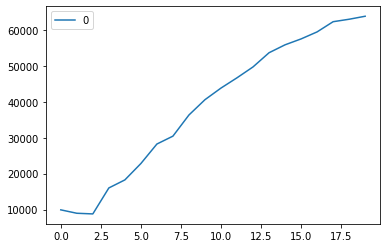

In [102]:
# best K value

from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

# Root Mean Squared Error 
rmse_val = []

for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)
    
curve = pd.DataFrame(rmse_val)
curve.plot()

In [103]:
# for this training set, best k value is 2
# this is another (better) way of getting the right k value

from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 2}

In [104]:
spain = covid.loc[covid['country'] == 'Spain']
spain= spain.drop(columns=['iso', 'country', 'date', 'fatalities'])
spain.reset_index(drop=True, inplace=True)

spain.loc[0, 'previous_cases'] = 0
for i in range(1, len(usa)):
    spain.loc[i, 'previous_cases'] = spain.loc[i - 1, 'total_cases']
    
spain['previous_cases'] = spain['previous_cases'].astype(int)
solution = spain
spain = spain.drop(['total_cases'], axis=1)

spain_scaled = scaler.fit_transform(spain)
spain = pd.DataFrame(spain_scaled)

predict = model.predict(spain)
spain['total_cases'] = predict
spain

,0,1,2,3,4,5,6,total_cases
0,0.794030,0.977434,0.000000,1.000000,1.000000,0.975978,0.000000,0.0
1,0.726643,1.000000,0.074847,0.975627,0.931421,0.874303,0.000016,0.0
2,0.694099,0.853447,0.094550,0.909930,0.921481,0.883341,0.000016,446.0
3,0.739864,0.799902,0.073688,0.925587,0.898601,0.958525,0.000048,0.0
4,0.770134,0.840557,0.041905,0.969437,0.943603,0.971879,0.000103,0.0
5,0.637286,0.976538,0.086566,0.923741,0.909568,0.818418,0.000119,0.0
6,0.734541,0.864978,0.050018,0.919407,0.942646,0.945477,0.000254,0.0
7,0.753214,0.762719,0.022897,0.951006,0.937123,0.977811,0.000357,0.0
8,0.710919,0.660299,0.100371,0.901164,0.861057,0.922677,0.000666,446.0
9,0.723045,0.695012,0.077268,0.902872,0.892979,1.000000,0.000951,446.0
